In [1]:
# import necessary libraries

import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data Preparation and Cleaning ###

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
# cheking duplicate rows
df.duplicated().sum()

0

In [5]:
# chec for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df['has_review'] = df['last_review'].notna().astype(int)

In [7]:
# dropping unnecessary columns for insignificant impact on price prediction and data privacy reasons

df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,1
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1


In [8]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
has_review                            0
dtype: int64

In [9]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [10]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
has_review                        0
dtype: int64

In [11]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
has_review                          int32
dtype: object

### Explatory Data Analysis ###

In [12]:
# describe the data
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.794417
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.404131
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,1.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000


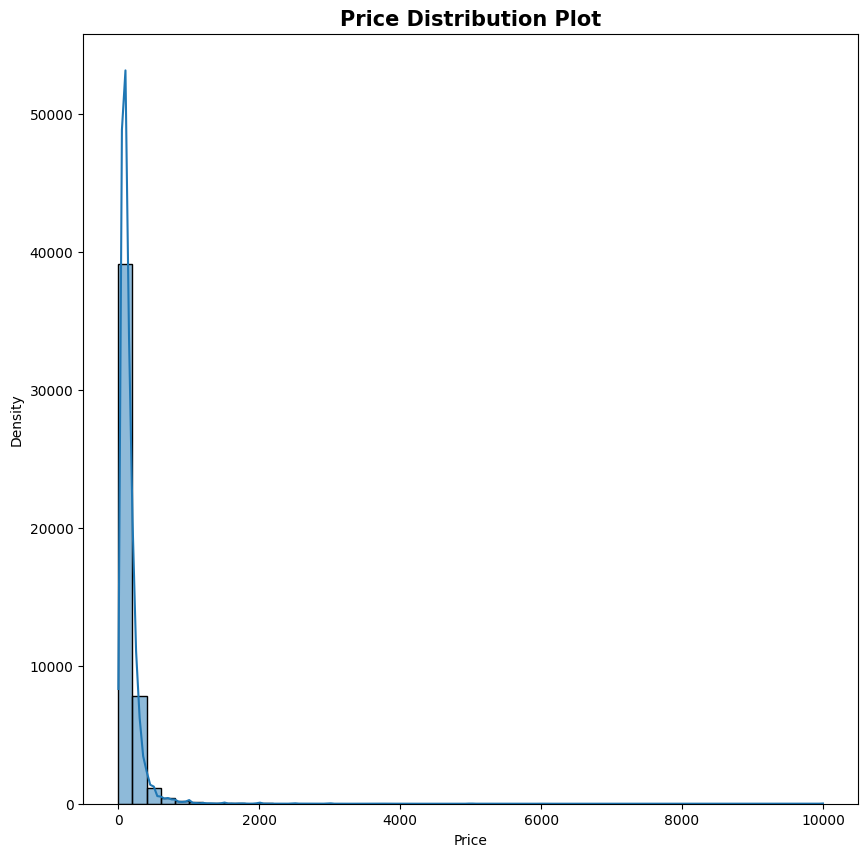

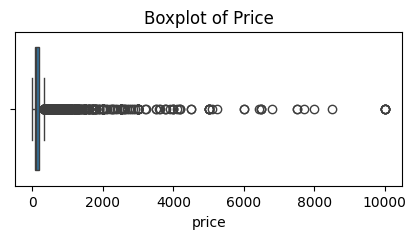

In [13]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution Plot",size=15, weight='bold')
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# Boxplot to check for long tail
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

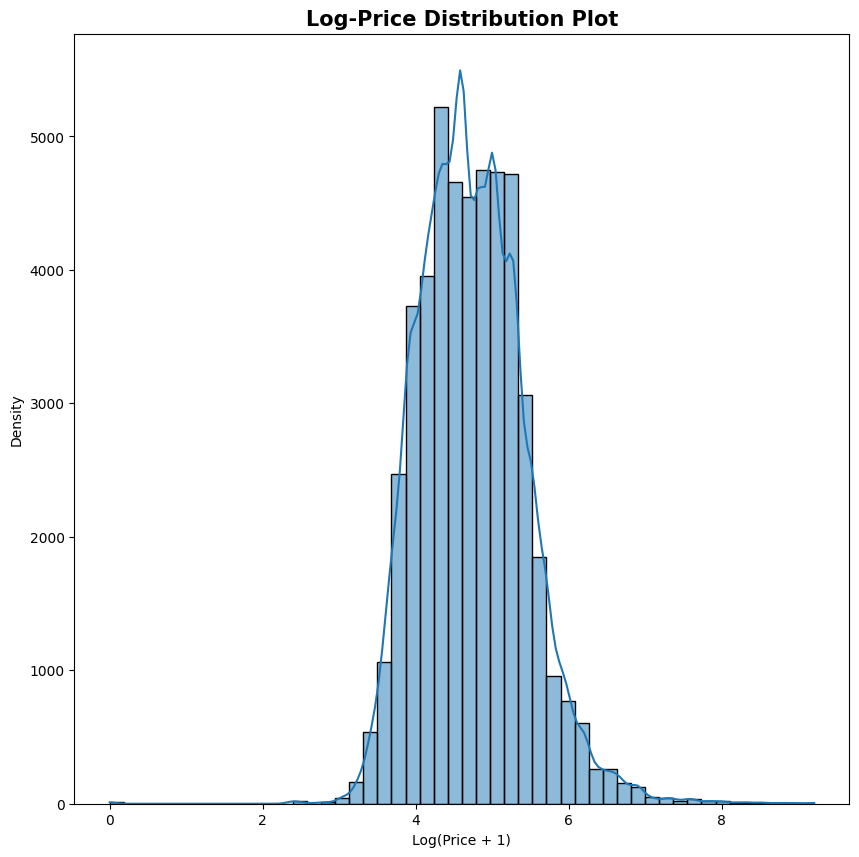

In [14]:
# Log-Price Distribution Plot
plt.figure(figsize=(10,10))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
plt.xlabel("Log(Price + 1)")
plt.ylabel("Density")
plt.show()

In [15]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

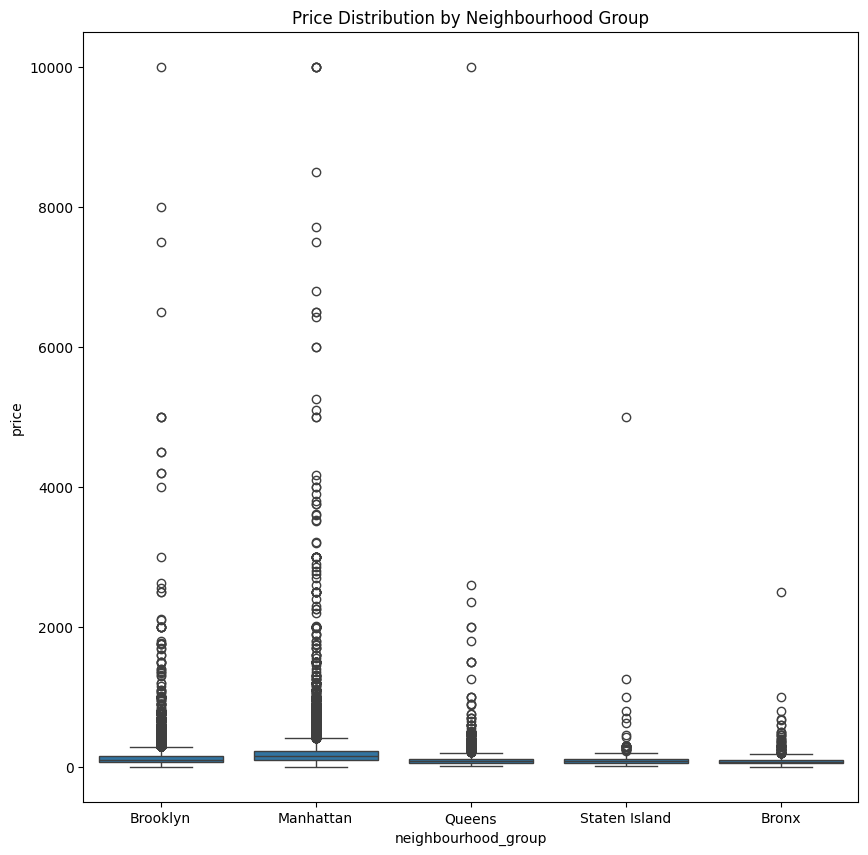

In [16]:
# relationship between price and neighbourhood group
# resize to make the price scale more visible
plt.figure(figsize=(10,10))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

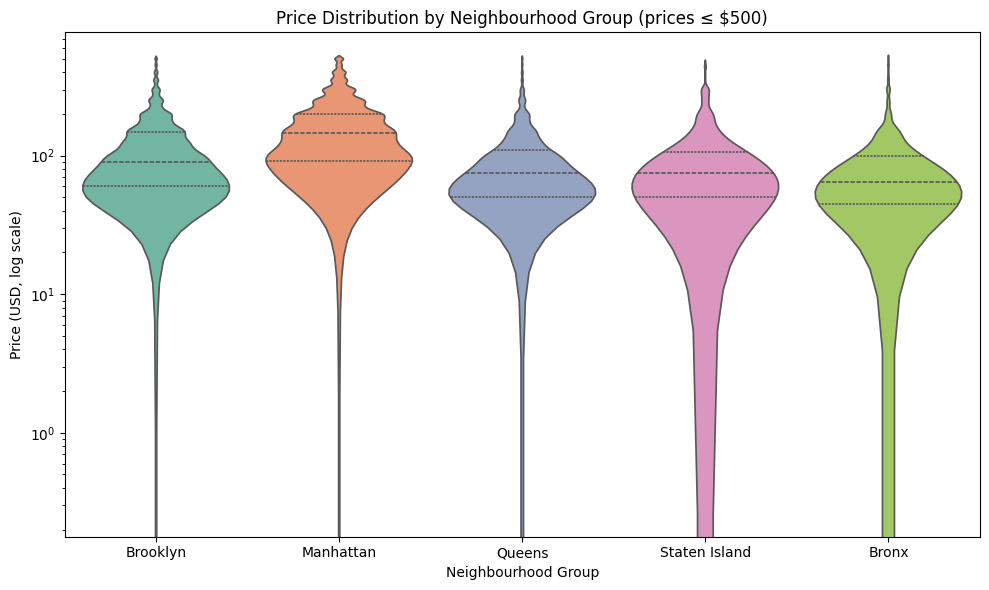

In [17]:
# Violin plot: price distribution by neighbourhood_group
# We cap extreme prices for clearer visualization and use a hue to assign distinct colors.
df_filtered = df[df['price'] <= 500]  # adjust cap as needed

plt.figure(figsize=(10,6))
ax = sns.violinplot(
    x='neighbourhood_group',
    y='price',
    data=df_filtered,
    hue='neighbourhood_group',   # different colors per group
    dodge=False,                 # avoid splitting since x already separates groups
    palette='Set2',
    inner='quartile'
)
# remove duplicate legend created by hue
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.yscale('log')  # optional: use log scale to reduce skew from high-priced outliers
plt.title('Price Distribution by Neighbourhood Group (prices ≤ $500)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD, log scale)')
plt.tight_layout()
plt.show()

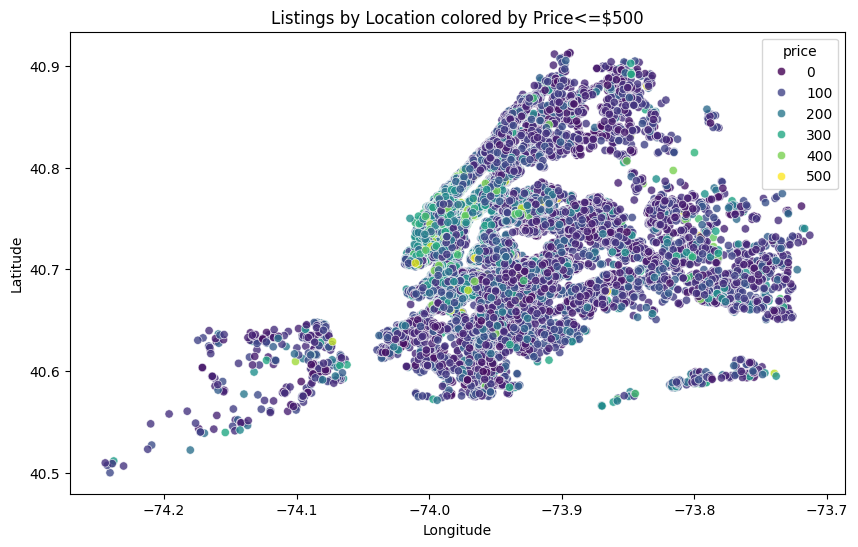

In [18]:
plt.figure(figsize=(10,6))
# use keyword arguments so seaborn knows which columns are x/y and which dataframe to use
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_filtered, alpha=0.8, palette='viridis')
plt.title('Listings by Location colored by Price<=$500')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This visualization provides useful geographic context:

Price is strongly tied to location, with NYC’s most expensive zones clearly lit up.

Manhattan dominates the high-price segment, while outer boroughs contain more lower-cost listings.

Spatial clustering is evident and could be leveraged for:

Pricing models

Neighborhood segmentation

Predictive modeling

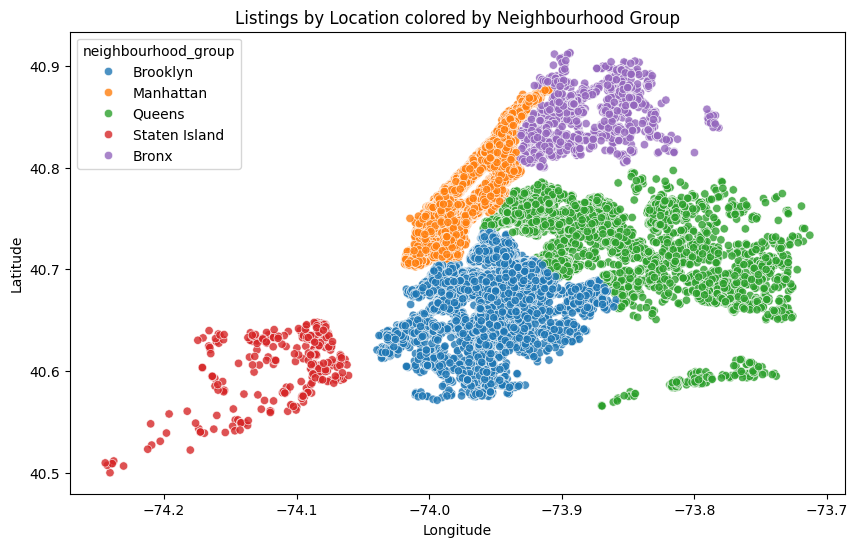

In [19]:
plt.figure(figsize=(10,6))
# use keyword arguments so seaborn knows which columns are x/y and which dataframe to use
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.8)
plt.title('Listings by Location colored by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

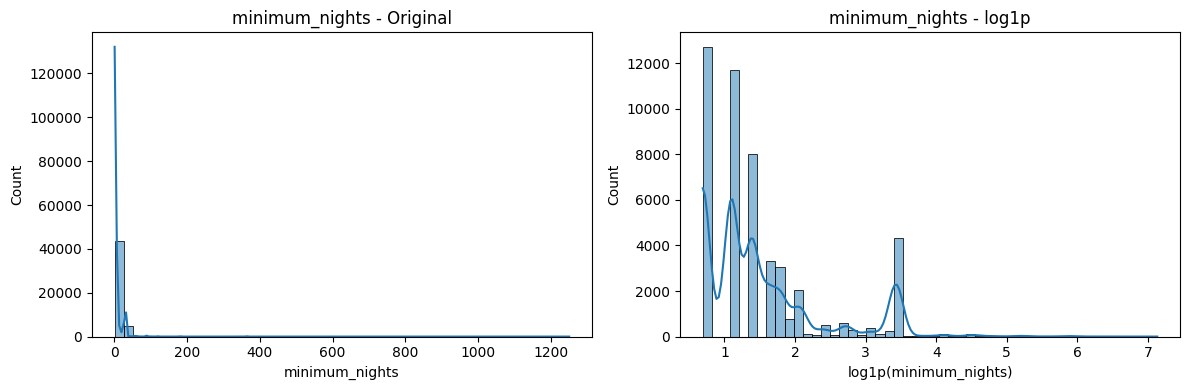

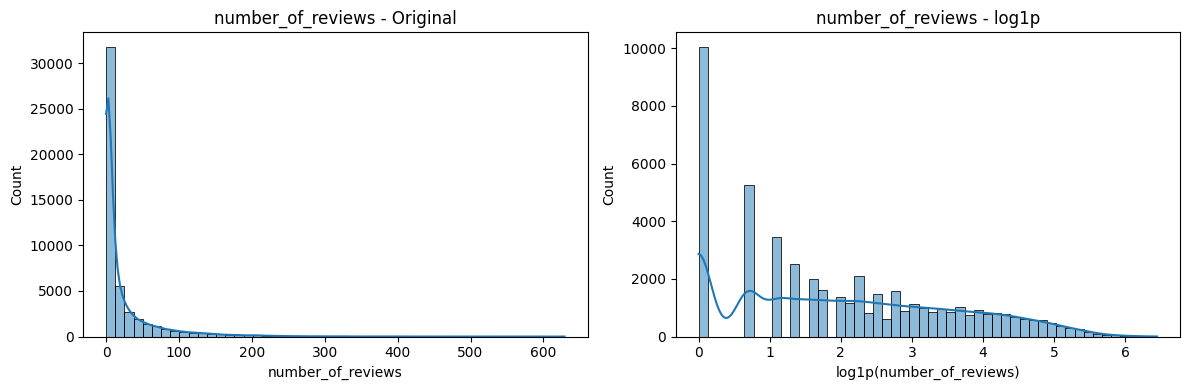

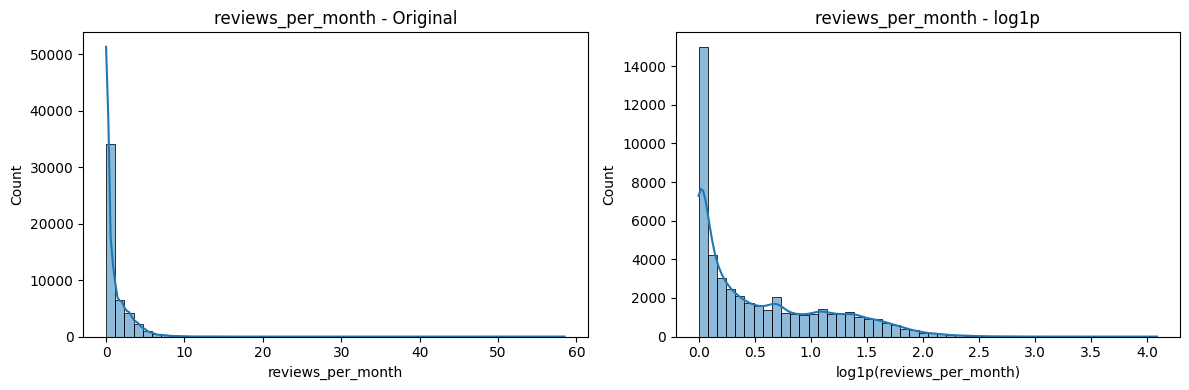

In [20]:
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']

for col in features:
    if col not in df.columns:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # phân phối gốc
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f'{col} - Original')
    axes[0].set_xlabel(col)

    # phân phối sau log1p
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f'{col} - log1p')
    axes[1].set_xlabel(f'log1p({col})')

    plt.tight_layout()
    plt.show()

In [21]:
log_features = [
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count'
]

for col in log_features:
    if col in df.columns:
        df[col] = np.log1p(df[col])

### Further Pre-processing and Data Encoding ###

In [22]:
df.drop(['host_id','latitude','longitude','neighbourhood'], axis=1, inplace=True)
#examing the changes
df.head(5)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,Brooklyn,Private room,149,0.693147,2.302585,0.190620,1.945910,365,1
1,Manhattan,Entire home/apt,225,0.693147,3.828641,0.322083,1.098612,355,1
2,Manhattan,Private room,150,1.386294,0.000000,0.000000,0.693147,365,0
3,Brooklyn,Entire home/apt,89,0.693147,5.602119,1.729884,0.693147,194,1
4,Manhattan,Entire home/apt,80,2.397895,2.302585,0.095310,0.693147,0,1


In [23]:
def encode_onehot(df, cols):
    df = df.copy()
    cols = [c for c in cols if c in df.columns]
    if not cols:
        return df
    return pd.get_dummies(df, columns=cols, drop_first=False)

df = encode_onehot(df, cols=['neighbourhood_group', 'room_type'])


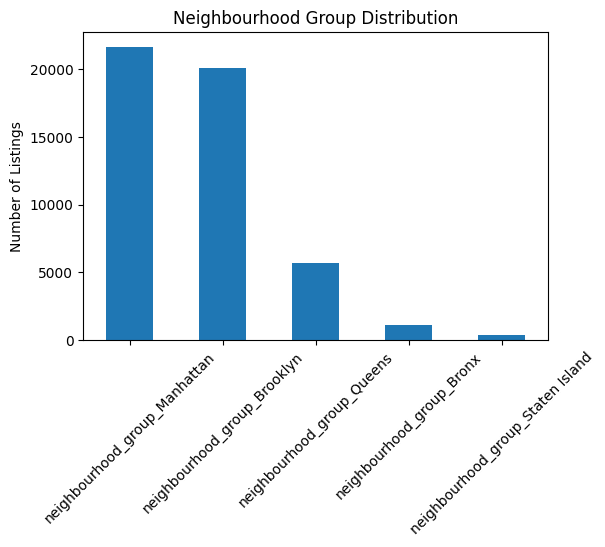

In [24]:
neigh_cols = [c for c in df.columns if c.startswith('neighbourhood_group_')]

neigh_counts = df[neigh_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
neigh_counts.plot(kind='bar')
plt.title('Neighbourhood Group Distribution')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


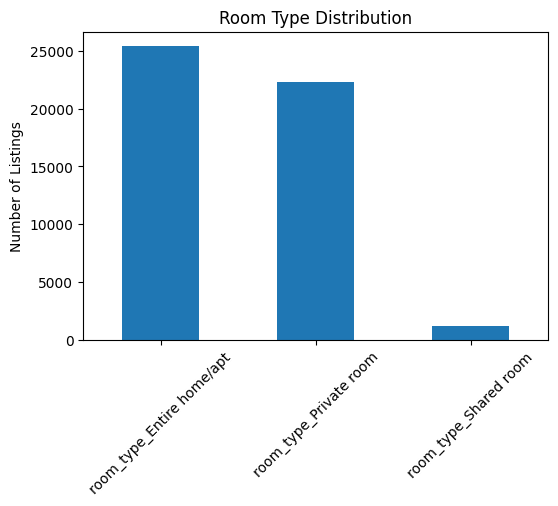

In [25]:
room_cols = [c for c in df.columns if c.startswith('room_type_')]

room_counts = df[room_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
room_counts.plot(kind='bar')
plt.title('Room Type Distribution')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.000000,69.000000,106.000000,175.000000,10000.000000
minimum_nights,48895.0,1.499881,0.869823,0.693147,0.693147,1.386294,1.791759,7.131699
number_of_reviews,48895.0,1.990775,1.564185,0.000000,0.693147,1.791759,3.218876,6.445720
reviews_per_month,48895.0,0.542640,0.577769,0.000000,0.039221,0.314811,0.947789,4.085976
calculated_host_listings_count,48895.0,1.087216,0.858668,0.693147,0.693147,0.693147,1.098612,5.793014
availability_365,48895.0,112.781327,131.622289,0.000000,0.000000,45.000000,227.000000,365.000000
has_review,48895.0,0.794417,0.404131,0.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.skew().sort_values(ascending=False)


price                                19.118939
neighbourhood_group_Staten Island    11.318186
neighbourhood_group_Bronx             6.468545
room_type_Shared room                 6.259199
calculated_host_listings_count        3.279837
neighbourhood_group_Queens            2.400202
minimum_nights                        1.498510
reviews_per_month                     0.950423
availability_365                      0.763408
number_of_reviews                     0.362924
neighbourhood_group_Brooklyn          0.361088
neighbourhood_group_Manhattan         0.229460
room_type_Private room                0.174218
room_type_Entire home/apt            -0.078722
has_review                           -1.457094
dtype: float64

In [28]:
cat_cols = [
    c for c in df.columns 
    if c.startswith('neighbourhood_group') or c.startswith('room_type')
]

df[cat_cols].mean().sort_values(ascending=False)


room_type_Entire home/apt            0.519665
room_type_Private room               0.456611
neighbourhood_group_Manhattan        0.443011
neighbourhood_group_Brooklyn         0.411167
neighbourhood_group_Queens           0.115881
room_type_Shared room                0.023724
neighbourhood_group_Bronx            0.022313
neighbourhood_group_Staten Island    0.007629
dtype: float64

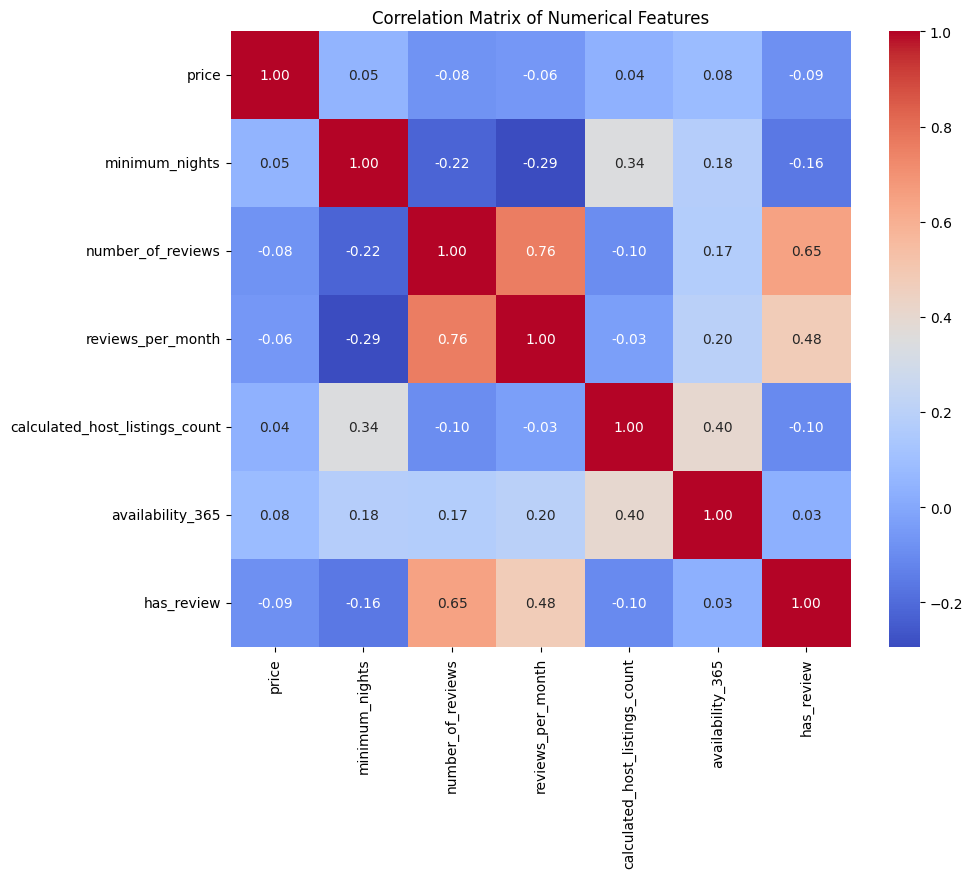

In [29]:
# Correlation Matrix between Numerical Features
plt.figure(figsize=(10,8))
# select only numeric columns to avoid conversion errors from object columns (e.g., neighbourhood names)
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Modelling ##

In [30]:
from sklearn.model_selection import train_test_split
 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = (df_train.price).values
y_val = (df_val.price).values
y_test = (df_test.price).values


y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

### Linear Regression ###

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,  mean_absolute_error

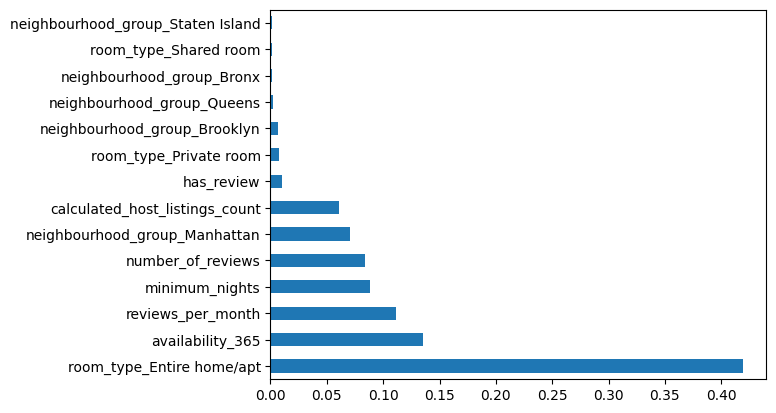

In [47]:
feature_model = ExtraTreesRegressor(
    n_estimators=200,
    random_state=42
)
feature_model.fit(df_train, y_train)

feat_importances = pd.Series(
    feature_model.feature_importances_,
    index=df_train.columns
).sort_values(ascending=False)

feat_importances.head(15).plot(kind='barh')
plt.show()


In [48]:
# Linear model 1: Building the model with all features
X_train = df_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val = df_val
X_val_scaled   = scaler.transform(X_val)


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_val = lr.predict(X_val_scaled)


# đánh giá trên GIÁ GỐC
rmse = root_mean_squared_error(
    np.expm1(y_val),
    np.expm1(y_pred_val)
)

mae = mean_absolute_error(
    np.expm1(y_val),
    np.expm1(y_pred_val)
)

print("Linear RMSE (price):", rmse)
print("Linear MAPE:", mae)

Linear RMSE (price): 204.49015281120293
Linear MAPE: 63.10629448290235


In [34]:
# # features to use without the less important features

# base = [ "minimum_nights", "calculated_host_listings_count", "availability_365"]

In [35]:
# # build linear regression using only features from `base`
# features = [f for f in base if f in df_train.columns]
# if not features:
#     raise ValueError("No features from 'base' are present in df_train.")

# lr_base = LinearRegression()
# lr_base.fit(X_train[features], y_train)

# y_pred_val_base = lr_base.predict(X_val[features])
# mse_base = mean_squared_error(y_val, y_pred_val_base)
# rmse_base = np.sqrt(mse_base)


# print("Features used:", features)
# print("Validation RMSE (log-price):", rmse_base)

# # evaluate on test set if available
# if 'df_test' in globals() and set(features).issubset(df_test.columns):
#     y_pred_test_base = lr_base.predict(df_test[features])
#     mse_test_base = mean_squared_error(y_test, y_pred_test_base)
#     rmse_test_base = np.sqrt(mse_test_base)

#     print("Test RMSE (log-price):", rmse_test_base)

In [ ]:
# base = ["minimum_nights", "calculated_host_listings_count", "availability_365","neighbourhood_group_Brooklyn","neighbourhood_group_Manhattan","neighbourhood_group_Queens","neighbourhood_group_Staten Island", "room_type_Private room",	"room_type_Shared room", 'has_review']

In [50]:
# selection of regularization parameter "r"
from sklearn.linear_model import Ridge


for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    y_pred = ridge.predict(X_val_scaled)
    
    rmse = root_mean_squared_error(
        np.expm1(y_val),
        np.expm1(y_pred)
    )

    mae = mean_absolute_error(
        np.expm1(y_val),
        np.expm1(y_pred)
    )
    
    print(f'alpha={alpha:>6} | RMSE={rmse:.2f}')
    print(f'alpha={alpha:>6} | MAE={mae:.2f}')

alpha=  0.01 | RMSE=204.51
alpha=  0.01 | MAE=63.10
alpha=   0.1 | RMSE=204.51
alpha=   0.1 | MAE=63.10
alpha=     1 | RMSE=204.51
alpha=     1 | MAE=63.10
alpha=    10 | RMSE=204.51
alpha=    10 | MAE=63.10
alpha=   100 | RMSE=204.54
alpha=   100 | MAE=63.10


#### Final Model ####

In [51]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
y_pred_train = ridge.predict(X_train_scaled)
print('train rmse', root_mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train)))
print('train mae', mean_absolute_error(np.expm1(y_train), np.expm1(y_pred_train)))


y_pred_val = ridge.predict(X_val_scaled)
print('val rmse', round(root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred_val)), 2))
print('val mae', round(mean_absolute_error(np.expm1(y_val), np.expm1(y_pred_val)), 2))

train rmse 232.20814746990115
train mae 63.531896323147095
val rmse 204.51
val mae 63.1


### Descision Tree Regressor ###

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.fillna(0).to_dict(orient='records')
val_dicts = df_val.fillna(0).to_dict(orient='records')
test_dicts = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [53]:
dv.get_feature_names_out()

array(['availability_365', 'calculated_host_listings_count', 'has_review',
       'minimum_nights', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'number_of_reviews', 'reviews_per_month',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'], dtype=object)

In [54]:
# decision tree with max_depth=1 regression

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)
rmse = root_mean_squared_error(np.expm1(y_train), np.expm1(y_pred))
mae = mean_absolute_error(np.expm1(y_train), np.expm1(y_pred))
print("train mae : \n", mae)
print('train rmse', rmse)

train mae : 
 68.5894370239955
train rmse 236.95345066134615


In [55]:
y_pred = dt.predict(X_val)
rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
print("MAPE on validation set: \n", mae)
print('RMSE on validation set', rmse)

MAPE on validation set: 
 68.34493450986425
RMSE on validation set 210.6549597853956


In [56]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
    print("MAPE on validation set with max_depth =", depth, ": \n", mae)     
    print('%4s -> %.3f' % (depth, rmse))

MAPE on validation set with max_depth = 1 : 
 68.34493450986426
   1 -> 210.655
MAPE on validation set with max_depth = 2 : 
 65.29741306235763
   2 -> 207.776
MAPE on validation set with max_depth = 3 : 
 64.35790400554185
   3 -> 206.316
MAPE on validation set with max_depth = 4 : 
 63.74304715931462
   4 -> 205.303
MAPE on validation set with max_depth = 5 : 
 62.9210250611573
   5 -> 203.967
MAPE on validation set with max_depth = 6 : 
 62.390290936530654
   6 -> 202.805
MAPE on validation set with max_depth = 10 : 
 63.15574214676024
  10 -> 207.551
MAPE on validation set with max_depth = 15 : 
 68.9556888614771
  15 -> 219.640
MAPE on validation set with max_depth = 20 : 
 76.50556128291812
  20 -> 220.671
MAPE on validation set with max_depth = None : 
 83.42607893560587
None -> 242.607


In [74]:
scores = []
 
for d in [1,2,3,4, 5, 6, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20]:
        dt = DecisionTreeRegressor(
            max_depth=d,
            min_samples_leaf=s,
            random_state=42
        )

        dt.fit(X_train, y_train)
 
        y_pred = dt.predict(X_val)
        rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
        mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
        print("RMSE on validation set with max_depth =", d, "and min_samples_leaf =", s, ": \n", rmse)
         
        scores.append((d, s, rmse))
 
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

RMSE on validation set with max_depth = 1 and min_samples_leaf = 1 : 
 210.6549597853956
RMSE on validation set with max_depth = 1 and min_samples_leaf = 2 : 
 210.6549597853956
RMSE on validation set with max_depth = 1 and min_samples_leaf = 5 : 
 210.6549597853956
RMSE on validation set with max_depth = 1 and min_samples_leaf = 10 : 
 210.6549597853956
RMSE on validation set with max_depth = 1 and min_samples_leaf = 15 : 
 210.6549597853956
RMSE on validation set with max_depth = 1 and min_samples_leaf = 20 : 
 210.6549597853956
RMSE on validation set with max_depth = 2 and min_samples_leaf = 1 : 
 207.77627833186008
RMSE on validation set with max_depth = 2 and min_samples_leaf = 2 : 
 207.77627833186008
RMSE on validation set with max_depth = 2 and min_samples_leaf = 5 : 
 207.77627833186008
RMSE on validation set with max_depth = 2 and min_samples_leaf = 10 : 
 207.77627833186008
RMSE on validation set with max_depth = 2 and min_samples_leaf = 15 : 
 207.77627833186008
RMSE on val

,max_depth,min_samples_leaf,rmse
0,1,1,210.65496
1,1,2,210.65496
2,1,5,210.65496
3,1,10,210.65496
4,1,15,210.65496


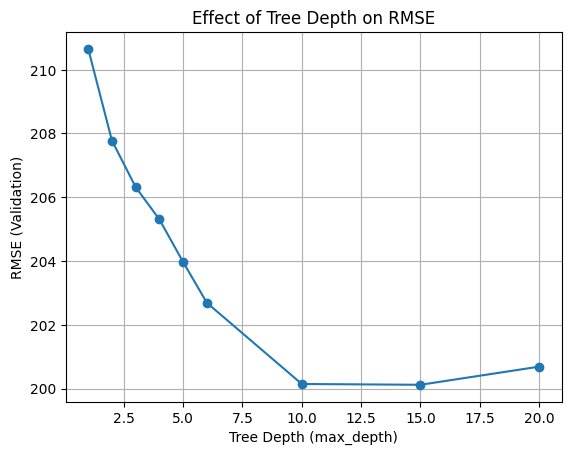

In [75]:
import matplotlib.pyplot as plt

# Lấy RMSE tốt nhất cho mỗi max_depth
df_depth_rmse = (
    df_scores
    .groupby('max_depth')['rmse']
    .min()
    .reset_index()
    .sort_values('max_depth')
)

# Vẽ biểu đồ
plt.figure()
plt.plot(
    df_depth_rmse['max_depth'],
    df_depth_rmse['rmse'],
    marker='o'
)
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('RMSE (Validation)')
plt.title('Effect of Tree Depth on RMSE')
plt.grid(True)
plt.show()


In [76]:
df_scores.sort_values(by='rmse', ascending=True).head()

,max_depth,min_samples_leaf,rmse
44,15,5,200.116971
38,10,5,200.141800
45,15,10,200.564700
40,10,15,200.583421
46,15,15,200.595878


In [77]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                               \
max_depth              1        2        3        4        5        6    
min_samples_leaf                                                         
1                 210.655  207.776  206.316  205.303  203.967  202.805   
2                 210.655  207.776  206.316  205.303  203.967  202.773   
5                 210.655  207.776  206.316  205.303  203.967  202.688   
10                210.655  207.776  206.316  205.303  203.967  202.858   
15                210.655  207.776  206.316  205.303  203.967  202.835   
20                210.655  207.776  206.316  205.303  203.967  202.780   

                                             
max_depth              10       15       20  
min_samples_leaf                             
1                 207.401  213.767  235.685  
2                 208.851  210.109  214.206  
5                 200.142  200.117  200.989  
10                200.674  200.565  200.725  
15                200.583  200.596  200.685  
20                200.870  200.714  200.778

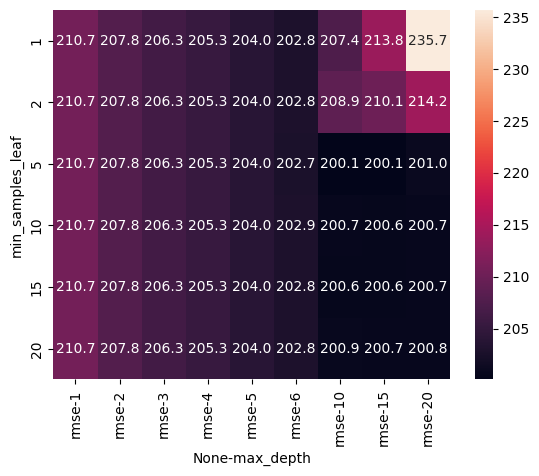

In [82]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".1f")
plt.show()

#### Final Model ####

In [79]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [80]:
y_pred_dt = dt.predict(X_val)
root_mean_squared_error( np.expm1(y_val), np.expm1(y_pred_dt))
mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred_dt))
print("RMSE on validation set: \n", rmse)
print("MAE on validation set: \n", mae)

RMSE on validation set: 
 200.7778787275267
MAE on validation set: 
 62.17613540608859


### Random Forest Regressor ###

In [83]:
from sklearn.ensemble import RandomForestRegressor
 
# n_estimators - number of models we want to use
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [84]:
y_pred = rf.predict(X_val)
print("RMSE on validation set: \n", root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
print("MAE on validation set: \n", mean_absolute_error(np.expm1(y_val), np.expm1(y_pred)))

RMSE on validation set: 
 202.26293440090194
MAE on validation set: 
 65.07401512428257


In [85]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
     
    scores.append((n, rmse))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,200.359664
1,20,199.616963
2,30,198.988411
3,40,199.110777
4,50,199.198603
5,60,199.223363
6,70,199.254942
7,80,199.152412
8,90,199.215835
9,100,199.175863


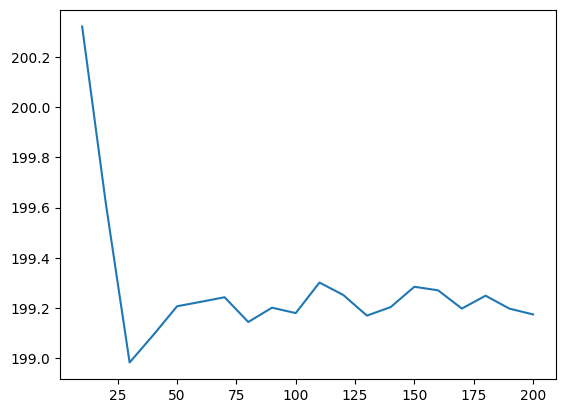

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

In [ ]:
scores = []
 
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1
                                    , n_jobs=-1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
        mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
        
        scores.append((d, n, rmse))
 
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,5,10,203.521308
1,5,20,203.528847
2,5,30,203.599895
3,5,40,203.634559
4,5,50,203.648163


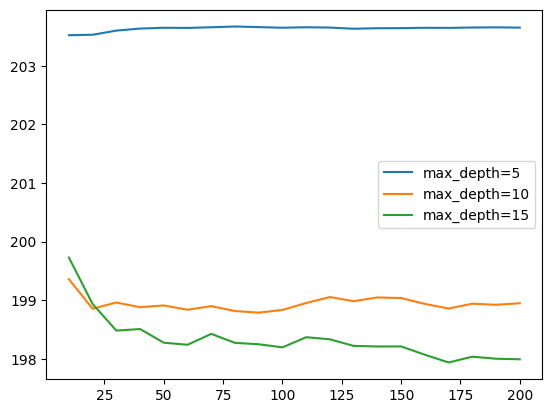

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)
 
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
max_depth = 10

scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
        mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
       
 
        scores.append((s, n, rmse))
 
columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

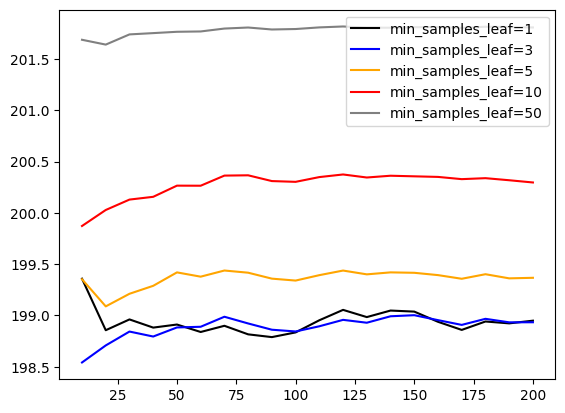

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()
plt.show()

#### Final Model ####

In [ ]:
min_samples_leaf = 3
max_depth = 15

In [ ]:
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=200,
                      n_jobs=-1, random_state=1)

In [ ]:
y_pred_rf = rf.predict(X_val)
rmse = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred_rf))
mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred_rf))
print("RMSE on validation set: \n", rmse)
print("MAE on validation set: \n", mae)


198.15070226947967

### Gradient Boosting and XGBoost ##

In [ ]:
import sys
print("Python đang chạy tại:", sys.executable)

Python đang chạy tại: d:\tài liệu học đh\chuyên ngành\hệ hỗ trợ quyết định\NYC-Airbnb-Price-Model\venv\Scripts\python.exe


In [ ]:
import xgboost as xgb   

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    # use a regression objective because target is continuous (log-price)
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

[0]	train-rmse:0.59909	val-rmse:0.60456
[1]	train-rmse:0.54356	val-rmse:0.54837
[2]	train-rmse:0.51173	val-rmse:0.51581
[3]	train-rmse:0.49406	val-rmse:0.49860
[4]	train-rmse:0.48410	val-rmse:0.48812
[5]	train-rmse:0.47839	val-rmse:0.48237
[6]	train-rmse:0.47366	val-rmse:0.47872
[7]	train-rmse:0.46993	val-rmse:0.47622
[8]	train-rmse:0.46744	val-rmse:0.47457
[9]	train-rmse:0.46521	val-rmse:0.47319
[10]	train-rmse:0.46315	val-rmse:0.47238
[11]	train-rmse:0.46193	val-rmse:0.47233
[12]	train-rmse:0.46078	val-rmse:0.47197
[13]	train-rmse:0.45947	val-rmse:0.47179
[14]	train-rmse:0.45862	val-rmse:0.47144
[15]	train-rmse:0.45781	val-rmse:0.47137
[16]	train-rmse:0.45693	val-rmse:0.47129
[17]	train-rmse:0.45624	val-rmse:0.47119
[18]	train-rmse:0.45584	val-rmse:0.47121
[19]	train-rmse:0.45463	val-rmse:0.47071
[20]	train-rmse:0.45413	val-rmse:0.47041
[21]	train-rmse:0.45318	val-rmse:0.47041
[22]	train-rmse:0.45274	val-rmse:0.47031
[23]	train-rmse:0.45192	val-rmse:0.47037
[24]	train-rmse:0.45046	va

In [ ]:
y_pred = model.predict(dval)
#y_pred[:10]
root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred))
print("RMSE on validation set: \n", root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))

RMSE on validation set: 
 197.26349625279786


In [ ]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
'eta=%s' % (xgb_params['eta'])

'eta=0.3'

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
'eta=%s' % (xgb_params['eta'])

'eta=0.1'

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
'eta=%s' % (xgb_params['eta'])

'eta=0.05'

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
'eta=%s' % (xgb_params['eta'])

'eta=0.01'

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

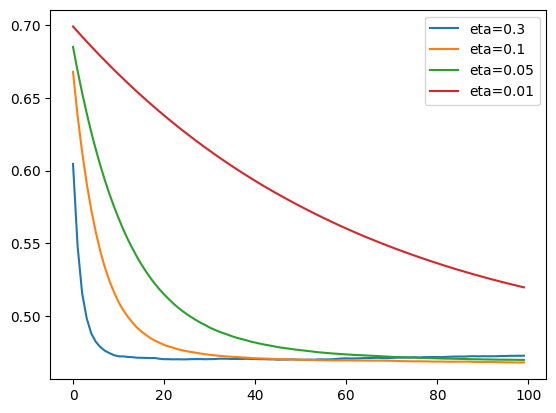

In [ ]:
# Best eta is 0.1

for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.show()

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

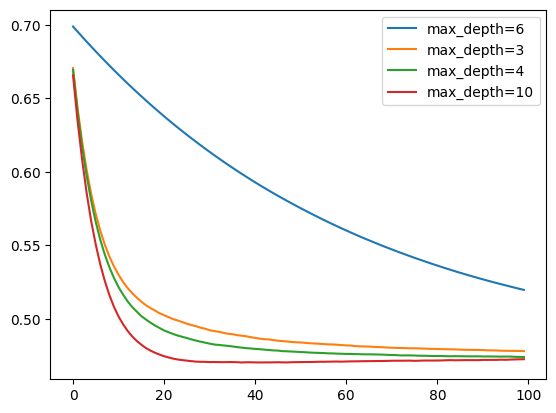

In [ ]:
# Best max_depth is 6

for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()
plt.show()

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 10,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 30,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

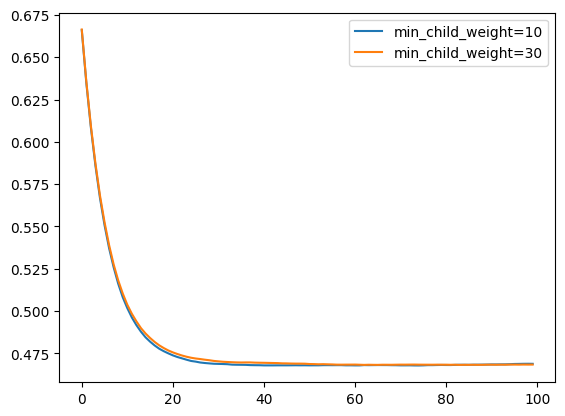

In [ ]:
# Best min_child 10

for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.legend()
plt.show()

In [ ]:
y_pred_xgb = model.predict(dval)
root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred_xgb)) 

0.46839103718704084

### Model Comparison ###

In [ ]:
xgb_rmse = 0.4785273627567061
rf_rmse = 0.48186025153273015
dt_rmse = 0.4961658354209349 
lr_rmse = 0.6118623257363902

In [ ]:
lr_value = globals().get('lr_rmse', globals().get('lr_remse', None))

results = {
    'xgboost': xgb_rmse,
    'random_forest': rf_rmse,
    'decision_tree': dt_rmse,
    'linear_regression': lr_value
}

df_results = pd.DataFrame(list(results.items()), columns=['model', 'rmse'])
df_results = df_results.sort_values('rmse', ascending=True).reset_index(drop=True)
df_results

,model,rmse
0,xgboost,0.478527
1,random_forest,0.481860
2,decision_tree,0.496166
3,linear_regression,0.611862


C:\Users\PC\AppData\Local\Temp\ipykernel_10460\3924352809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='model', y='rmse', data=df_plot, palette=bar_colors)


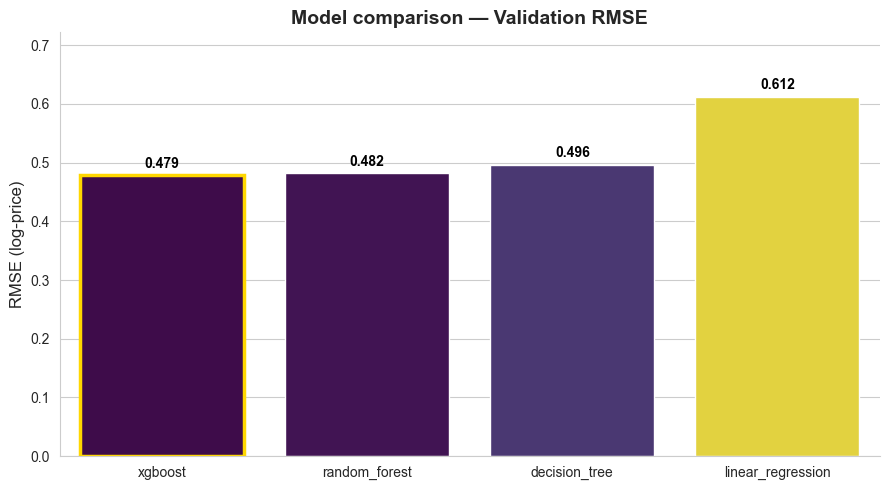

In [ ]:
# Colorful bar plot for df_results
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

# prepare data (best first)
df_plot = df_results.sort_values('rmse', ascending=True).reset_index(drop=True)

# create a color for each bar using a colormap mapped to RMSE
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(df_plot['rmse'].min(), df_plot['rmse'].max())
bar_colors = [cmap(norm(v)) for v in df_plot['rmse']]

ax = sns.barplot(x='model', y='rmse', data=df_plot, palette=bar_colors)

# annotate bars with RMSE values and highlight the best model
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.008,
            f"{height:.3f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)
    if i == 0:  # best (lowest) RMSE after sorting
        p.set_edgecolor('gold')
        p.set_linewidth(2.5)

ax.set_title('Model comparison — Validation RMSE', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('RMSE (log-price)', fontsize=12)
plt.ylim(0, df_plot['rmse'].max() * 1.18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

#### Using the best model to predict with test data ####

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_full_train = (df_full_train.price).values
y_test = (df_test.price).values


y_full_train = np.log1p(df_full_train.price.values)
y_test = np.log1p(df_test.price.values)

del df_full_train['price']
del df_test['price']


In [ ]:
full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

In [ ]:
features = list(dv.get_feature_names_out())

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
 

In [ ]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=100)
y_pred = model.predict(dtest)
print(root_mean_squared_error(y_test, y_pred))

0.48158031186146794


### Feature Importance ###

#### Descision Trees ####

In [ ]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)

In [ ]:
df_importance = df_importance[df_importance.gain > 0]

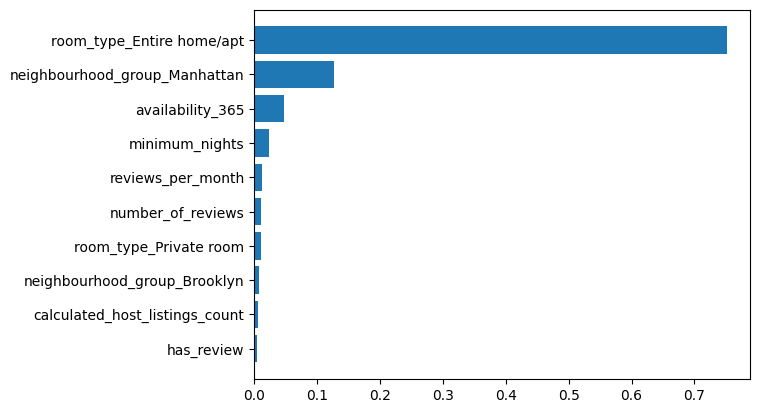

In [ ]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

#### Random Forest ####

In [ ]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)

In [ ]:
df_importance = df_importance[df_importance.gain > 0.01]

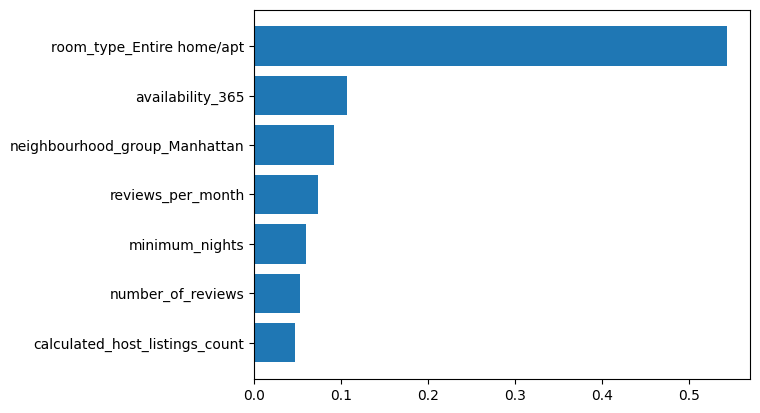

In [ ]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

#### XGBoost ####

In [ ]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('room_type_Entire home/apt', 335.11126708984375),
 ('neighbourhood_group_Manhattan', 29.789403915405273),
 ('room_type_Private room', 4.482949733734131),
 ('has_review', 2.3887999057769775),
 ('neighbourhood_group_Brooklyn', 2.0820131301879883),
 ('availability_365', 1.1977800130844116),
 ('calculated_host_listings_count', 1.1690163612365723),
 ('minimum_nights', 1.1479989290237427),
 ('neighbourhood_group_Bronx', 1.030197262763977),
 ('number_of_reviews', 0.8586418628692627),
 ('reviews_per_month', 0.8218562006950378),
 ('neighbourhood_group_Queens', 0.6590391993522644),
 ('neighbourhood_group_Staten Island', 0.4271601736545563),
 ('room_type_Shared room', 0.1610422134399414)]

In [ ]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('availability_365', 3182.0),
 ('reviews_per_month', 2640.0),
 ('number_of_reviews', 1927.0),
 ('minimum_nights', 1823.0),
 ('calculated_host_listings_count', 1655.0),
 ('neighbourhood_group_Brooklyn', 210.0),
 ('neighbourhood_group_Manhattan', 162.0),
 ('has_review', 142.0),
 ('room_type_Private room', 115.0),
 ('room_type_Entire home/apt', 85.0),
 ('neighbourhood_group_Queens', 80.0),
 ('neighbourhood_group_Bronx', 66.0),
 ('neighbourhood_group_Staten Island', 37.0),
 ('room_type_Shared room', 10.0)]

In [ ]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

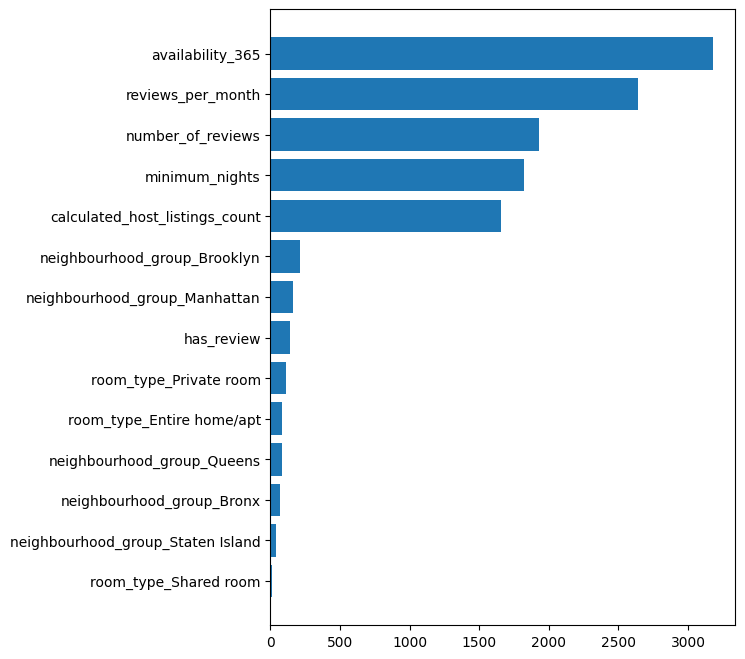

In [ ]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()